In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

pd.options.display.max_rows = 40
pd.options.display.max_columns = 44


# data경로 확보
full_path  = os.getcwd()
upper_path = os.path.dirname(full_path)
data_path  = os.path.join(upper_path, 'data')

# csv파일 경로 확보
train_path  = os.path.join(data_path, 'train.csv')
test_path   = os.path.join(data_path, 'test.csv')
sample_path = os.path.join(data_path, 'sample_submission.csv')

In [2]:
train  = pd.read_csv(train_path)
test   = pd.read_csv(test_path)
submission = pd.read_csv(sample_path)

In [3]:
# 필요없는 ID 제거
train = train.drop(labels='ID',axis=1)
train.columns

Index(['Click', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19',
       'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29',
       'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39'],
      dtype='object')

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(train[train.columns.difference(['Click'])], train['Click'], test_size=0.1, random_state=42)
del train

In [5]:
label_column = 'Click'
categoric_columns = X_train.select_dtypes(include='object').columns
numeric_columns = X_train.select_dtypes(include='float64').columns
print('y컬럼 : ',label_column)
print('x컬럼(범주형) : ',categoric_columns)
print('x컬럼(수치형) : ',numeric_columns)

y컬럼 :  Click
x컬럼(범주형) :  Index(['F01', 'F02', 'F03', 'F05', 'F07', 'F08', 'F09', 'F10', 'F12', 'F13',
       'F15', 'F16', 'F17', 'F20', 'F21', 'F22', 'F23', 'F25', 'F26', 'F28',
       'F30', 'F31', 'F34', 'F35', 'F37', 'F39'],
      dtype='object')
x컬럼(수치형) :  Index(['F04', 'F11', 'F18', 'F19', 'F24', 'F27', 'F29', 'F32', 'F33', 'F36',
       'F38'],
      dtype='object')


# EDA

In [6]:
for column in X_train.columns:
    print(column,':',X_train[column].isnull().sum())

F01 : 1111324
F02 : 1111324
F03 : 9489477
F04 : 5168719
F05 : 1111324
F06 : 0
F07 : 0
F08 : 0
F09 : 0
F10 : 1111324
F11 : 2660018
F12 : 1111324
F13 : 0
F14 : 0
F15 : 9489477
F16 : 0
F17 : 0
F18 : 6593122
F19 : 2330537
F20 : 9489477
F21 : 0
F22 : 0
F23 : 0
F24 : 8094999
F25 : 0
F26 : 9489477
F27 : 9957712
F28 : 0
F29 : 9957712
F30 : 0
F31 : 0
F32 : 225993
F33 : 2330537
F34 : 1111324
F35 : 0
F36 : 6593122
F37 : 0
F38 : 719934
F39 : 0


In [7]:
# unique 값들이 몇개인지
for column in categoric_columns:
    print(column,':',X_train[column].nunique())

F01 : 4360726
F02 : 288905
F03 : 62
F05 : 4886198
F07 : 146967
F08 : 78
F09 : 27247
F10 : 1302903
F12 : 3828088
F13 : 1306
F15 : 3
F16 : 15452
F17 : 10
F20 : 172232
F21 : 33
F22 : 7178
F23 : 948
F25 : 10661
F26 : 2203
F28 : 55
F30 : 19397
F31 : 14
F34 : 2910018
F35 : 3
F37 : 9368
F39 : 6800


In [8]:
# unique한 값들의 개수 합
for column in categoric_columns:
    value_counts = X_train[column].value_counts()
    unique_values = value_counts[value_counts == 1]
    print(column,':',len(unique_values))

F01 : 3633218
F02 : 143489
F03 : 1
F05 : 4146911
F07 : 39742
F08 : 4
F09 : 2640
F10 : 926266
F12 : 3144422
F13 : 10
F15 : 0
F16 : 186
F17 : 0
F20 : 59020
F21 : 0
F22 : 152
F23 : 14
F25 : 432
F26 : 10
F28 : 3
F30 : 442
F31 : 0
F34 : 2321088
F35 : 0
F37 : 491
F39 : 14


In [9]:
train_sample = X_train.sample(10000,replace=False)

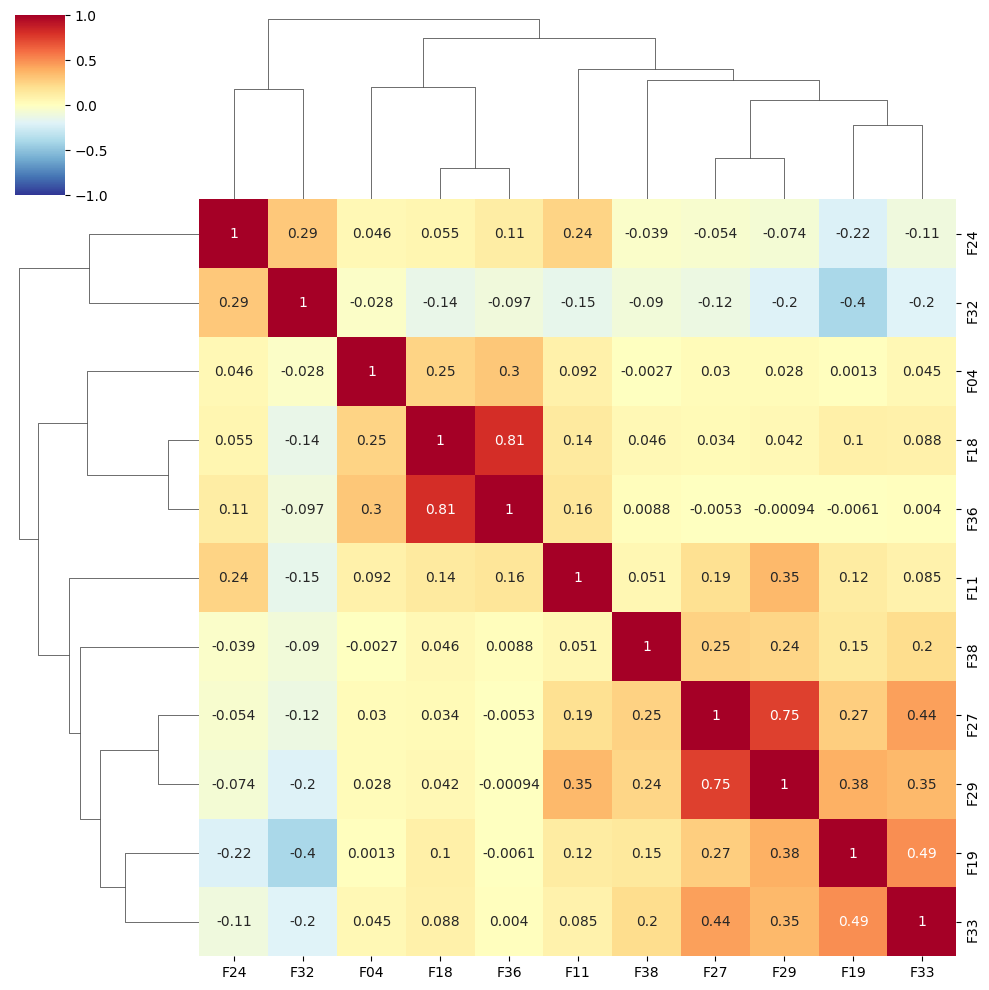

In [10]:
df = train_sample[numeric_columns].dropna().corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [11]:
x_num_and_y = list(numeric_columns)

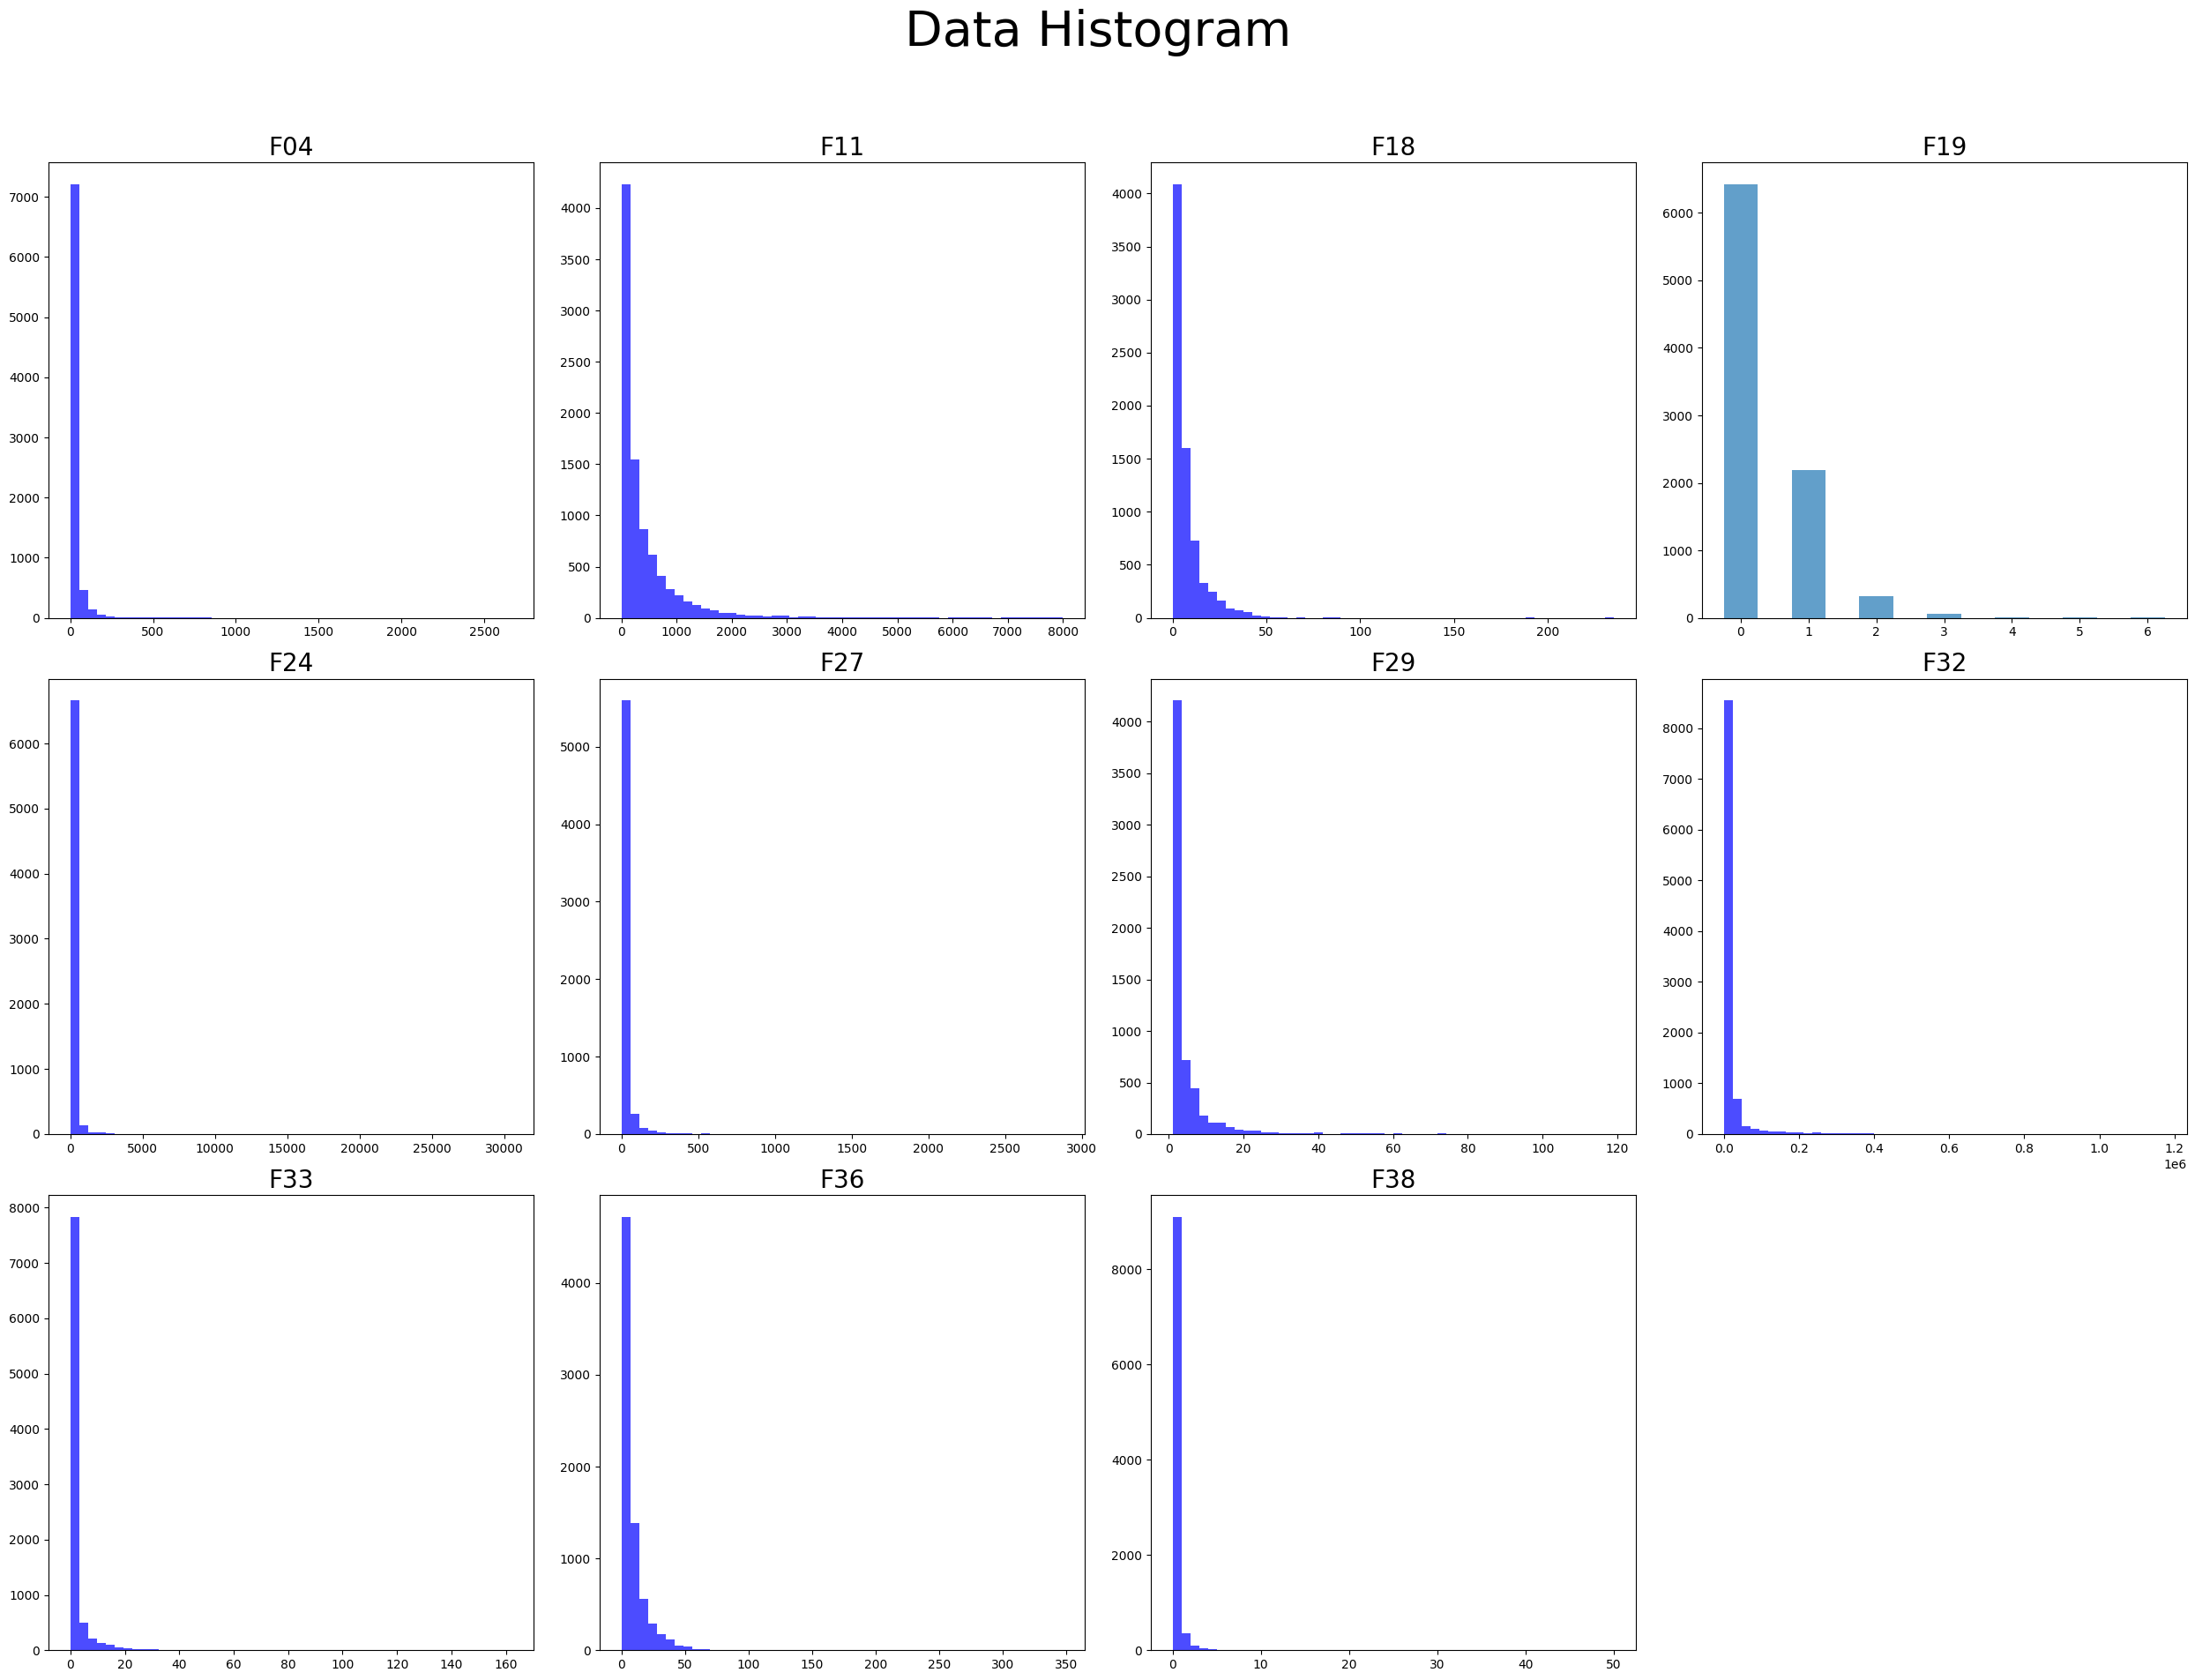

In [12]:
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

cols = train_sample[x_num_and_y].columns
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train_sample[x_num_and_y][cols[i]].unique()) > 20:
        plt.hist(train_sample[x_num_and_y][cols[i]], bins=50, color='b', alpha=0.7)
    else:
        temp = train_sample[x_num_and_y][cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
x_num_and_y.append(label_column)

In [14]:
X_train['Click'] = y_train
train_sample = X_train.sample(10000,replace=False)

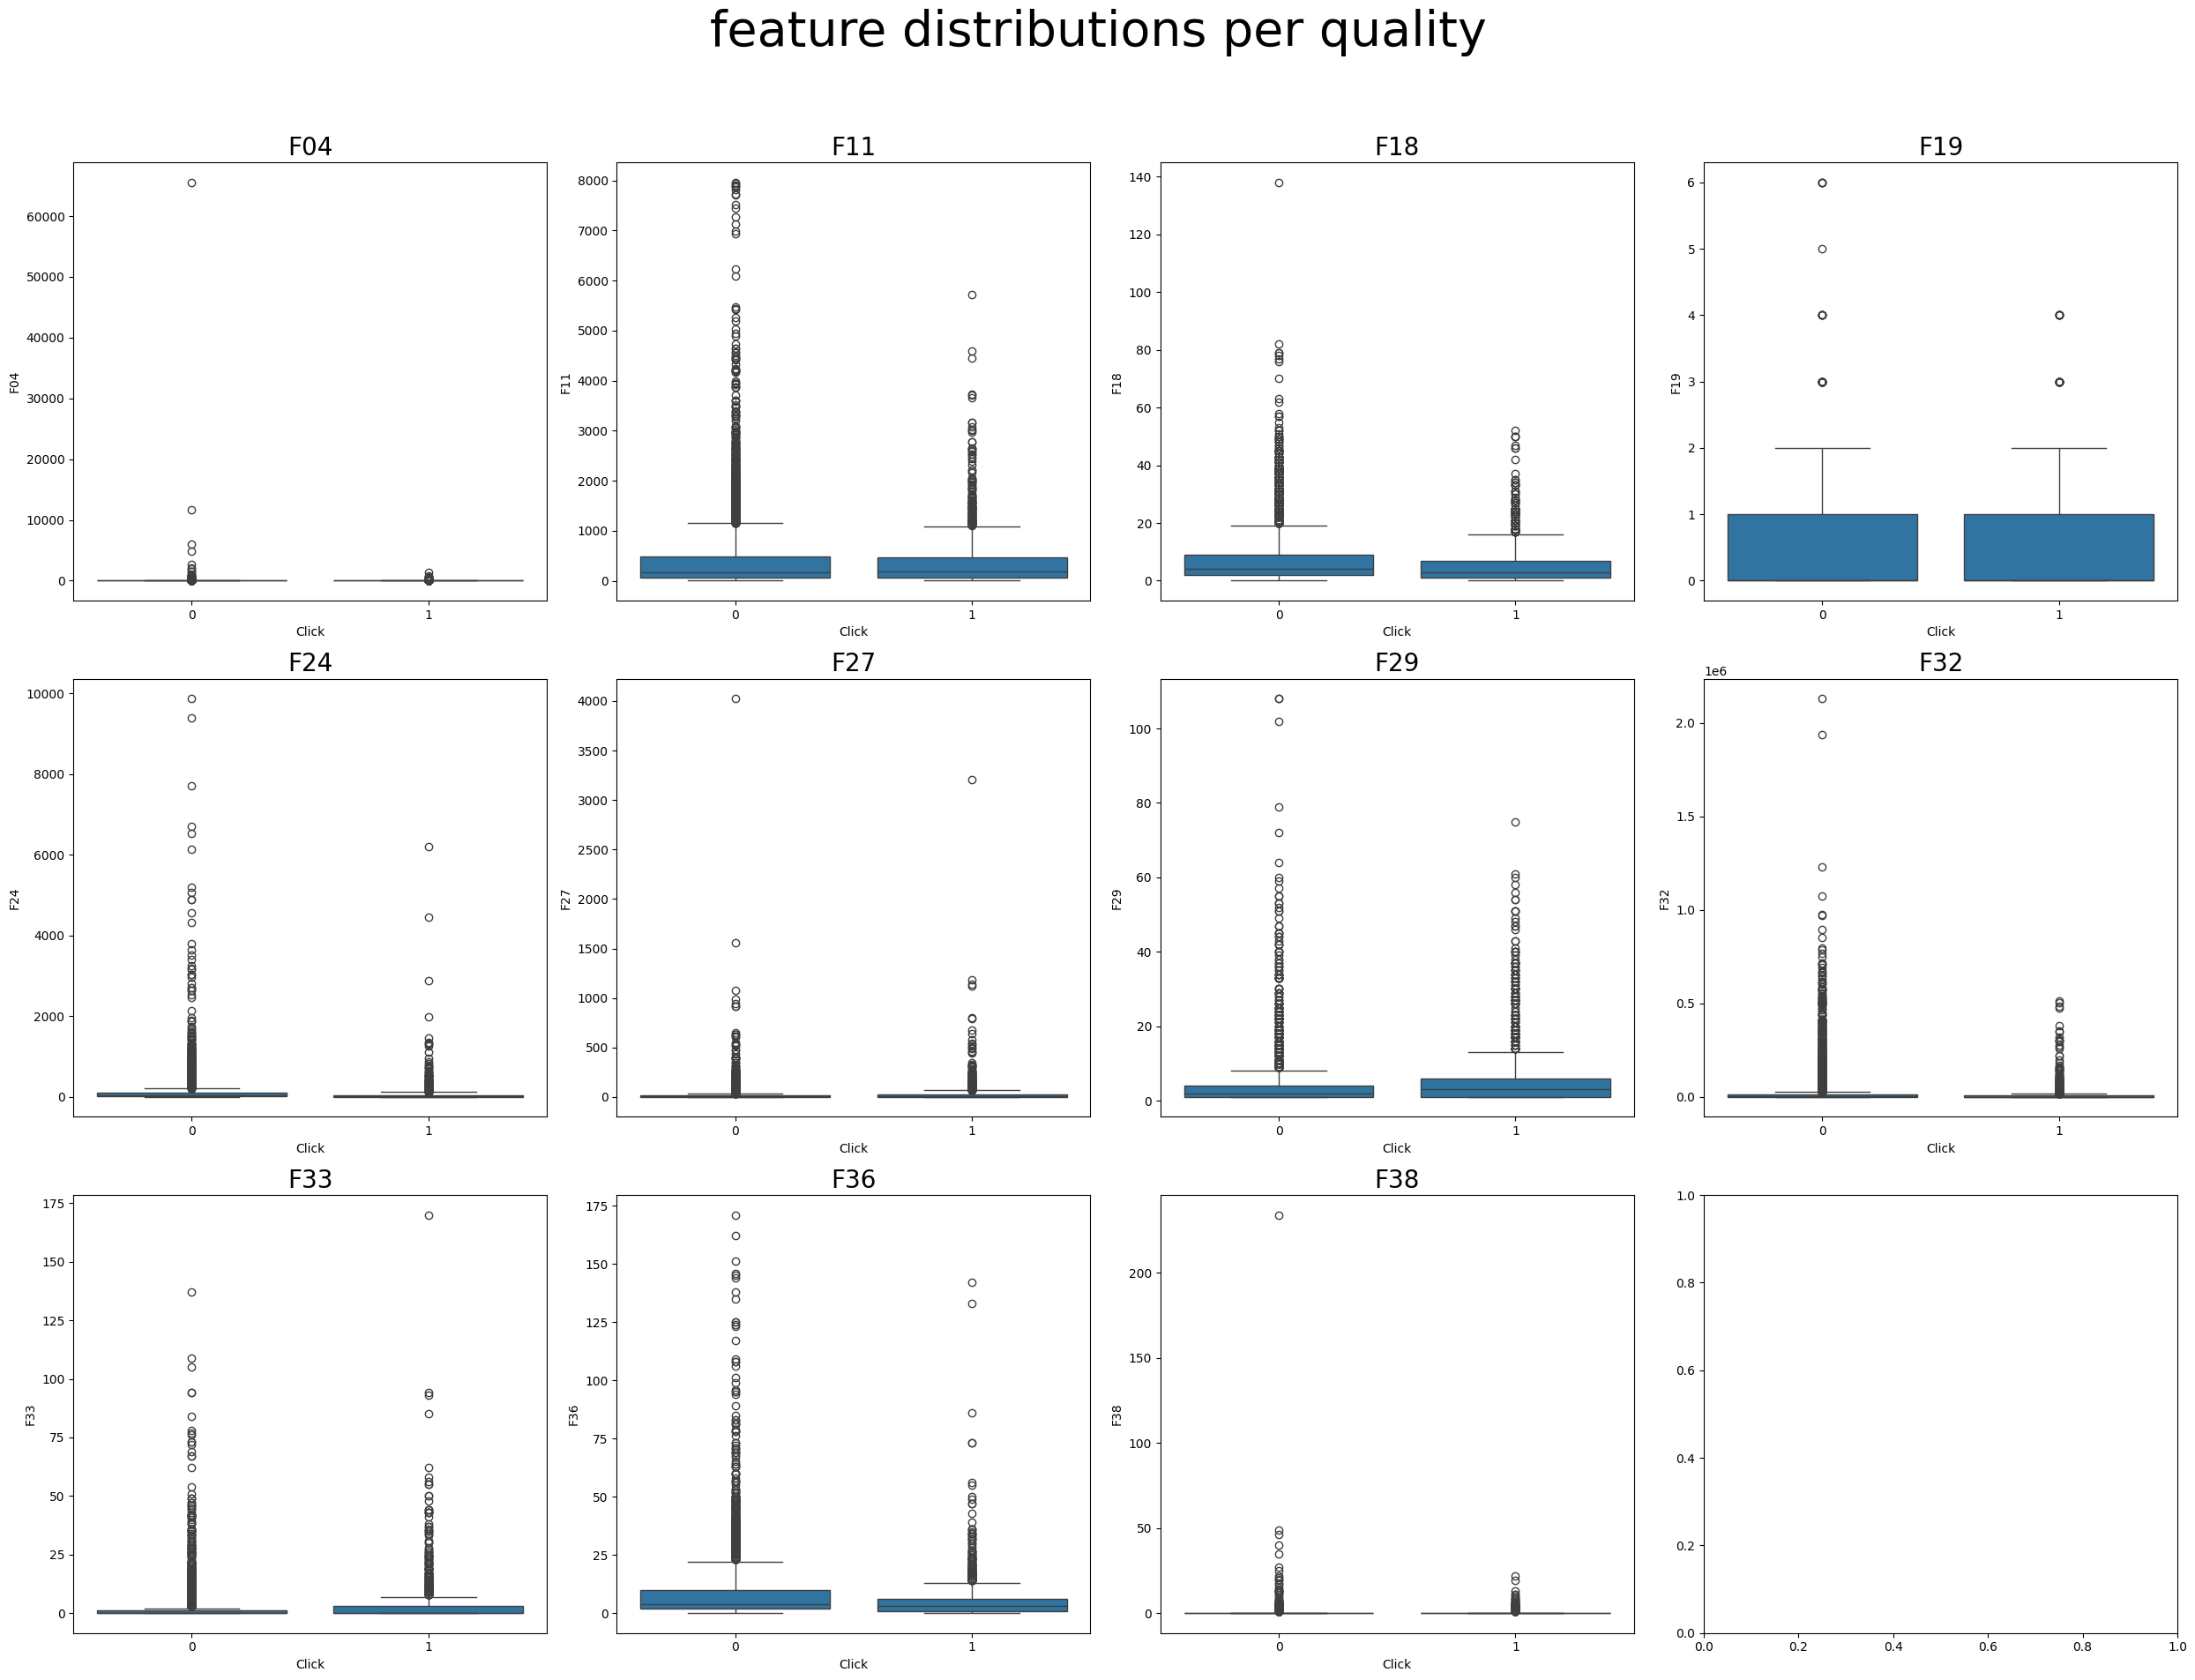

In [15]:
# 박스플롯
fig, axes = plt.subplots(3, 4, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train_sample[x_num_and_y].columns[:-1]):
    sns.boxplot(x= 'Click', y= col, ax=ax, data=train_sample[x_num_and_y])
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
# F04 컬럼에서 25000 이상의 값을 가진 행을 제거
train_sample_preprocess = train_sample[(train_sample['F04'] < 25000) | (train_sample['F04'].isnull())]

train_sample_preprocess = train_sample_preprocess[(train_sample_preprocess['F18'] < 100) | (train_sample_preprocess['F18'].isnull())]
train_sample_preprocess = train_sample_preprocess[(train_sample_preprocess['F24'] < 15000) | (train_sample_preprocess['F24'].isnull())]
train_sample_preprocess = train_sample_preprocess[(train_sample_preprocess['F33'] < 250) | (train_sample_preprocess['F33'].isnull())]
train_sample_preprocess = train_sample_preprocess[(train_sample_preprocess['F36'] < 250) | (train_sample_preprocess['F36'].isnull())]

In [11]:
train_sample_preprocess

,Click,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
19424439,0,SHADXHN,SIPGIOO,IAGJDOH,180.0,MGHWATO,117,PQZBVMG,FTPHMPQ,OZSBNFF,SSIMIYJ,1401.0,RZPLFLD,RELGLZH,12,NGMRRQG,ZIHDXMJ,ORHLUGM,1.0,0.0,DKGBKOT,LBABTIR,TZLIFDY,IZDGSXJ,NaN,KMHZPSL,WVRHGBC,NaN,MAVCFCM,NaN,NZGEZLW,GTISJWW,76664.0,0.0,VTPSDIU,MNBSNJV,8.0,ODVRCCX,0.0,APYWRBD
911957,0,JCDXFYU,PILDDJU,IAGJDOH,NaN,LFPUEOV,1,GFHVAJC,FTPHMPQ,AEUSMND,YLKUVQA,114.0,MGRUYII,UVKLSLO,0,ZNLREKK,LZUEEVP,ZSBOVQM,NaN,0.0,TGVLSYT,LUBUFOT,MCGNYVX,SCVQXFZ,17.0,RNEFTXE,WVRHGBC,11.0,YYEFTXW,3.0,HBJRMIE,KHZNEZF,584.0,0.0,QMOULXS,IRUDRFB,NaN,ZYMRDGR,0.0,PNSPZPK
26051300,0,JCDXFYU,PILDDJU,IAGJDOH,16.0,LFPUEOV,0,TROOOIM,FTPHMPQ,AMBHKXG,YLKUVQA,27.0,MGRUYII,WVHQZWQ,0,ZNLREKK,PXSXJRG,ORHLUGM,8.0,2.0,TGVLSYT,FUZMWEL,NVAQMNU,IDHAIQQ,0.0,FZSYJRN,WVRHGBC,NaN,MAVCFCM,NaN,JLDMOPI,KHZNEZF,18.0,6.0,QMOULXS,IRUDRFB,0.0,ZLCSSLU,0.0,ZVVUXFL
1510622,0,NaN,NaN,NOENOSO,14.0,NaN,305,ANZSEJM,UZPMJQQ,DFRRNWP,NaN,284.0,NaN,GFMRZDN,29,NGMRRQG,YQUHLCH,QANMWXR,27.0,3.0,LLRGWPV,BUUUKVW,MCGNYVX,VTYMMMX,27.0,RLADTNT,OWQOBGK,31.0,YYEFTXW,5.0,RHXADJX,GTISJWW,30.0,60.0,NaN,IRUDRFB,27.0,YRPRJJI,1.0,AZLEYIF
4363892,0,OKNWFQH,ZBVSBJX,DTZFPRW,2.0,JQQGQNJ,62,HFVVLRG,LPYPUNA,CTCFTTX,AASCNGC,193.0,UTRLJXQ,SMRBWMU,16,ZNLREKK,PUSLIDI,ZSBOVQM,2.0,1.0,DJUFYPX,SDHLNNQ,SKXCNNK,ZXHXBZQ,6.0,GLWHIGR,LEWXGAW,16.0,YYEFTXW,4.0,UASVWTP,GTISJWW,627.0,1.0,WERADNK,IRUDRFB,2.0,TFJMLCZ,0.0,PCOICUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27818357,0,TDTDOWR,QXAOASS,DTZFPRW,4.0,FYPNCVV,1,XPIXPKX,LPYPUNA,JYMQHID,JANQMCW,30.0,DCPPIAQ,SMRBWMU,0,ZHOLRQX,ILWTVTL,ORHLUGM,NaN,0.0,YWJBQEU,YBGYGNW,SNDDHSM,IDHAIQQ,NaN,CSMUGYA,ZPUKBCN,11.0,MAVCFCM,1.0,NZGEZLW,GTISJWW,4762.0,0.0,TWXTUBP,IRUDRFB,NaN,TFJMLCZ,0.0,LXLFPOE
15267486,1,JCDXFYU,PILDDJU,IAGJDOH,10.0,LFPUEOV,22,PQZBVMG,VAWXMCR,GPGUVJE,YLKUVQA,524.0,MGRUYII,KNRIFWN,3,ZNLREKK,ZSAIDYC,FMJARXS,2.0,0.0,TGVLSYT,FUZMWEL,IVZVOBA,IDHAIQQ,18.0,FTLSNFE,WVRHGBC,34.0,STJSBJK,8.0,YOQJFXT,KHZNEZF,2960.0,0.0,QMOULXS,IRUDRFB,2.0,NNWXELZ,2.0,OVMTRHB
25849832,0,LLKAVMO,EKJSVRG,NaN,1.0,YKHABYT,0,CASVYYK,LPYPUNA,OGTGOET,MTOLQPU,424.0,RDDXPRS,DBXROKY,3,NaN,TERNTXB,ORHLUGM,3.0,0.0,NaN,BUUUKVW,MCGNYVX,ZXHXBZQ,2090.0,SZHHEMY,NaN,13.0,YYEFTXW,2.0,IYUIISL,KDTWELZ,15478.0,0.0,ABEHJLN,MNBSNJV,3.0,NOTFWKW,0.0,ZKAXLRA
9834087,0,LLKAVMO,EKJSVRG,NaN,3.0,YKHABYT,0,QKLOGPT,MIGYEEG,ZCAFPSN,MTOLQPU,8.0,RDDXPRS,YJHOJQA,6,NaN,NWFVEVK,ORHLUGM,5.0,1.0,NaN,BJAYVHN,SNDDHSM,IDHAIQQ,10.0,SFRWXMZ,NaN,NaN,IYZTLFQ,NaN,MFPUCBU,GTISJWW,780.0,7.0,ABEHJLN,IRUDRFB,5.0,JUJSEMD,0.0,DRXFKGP


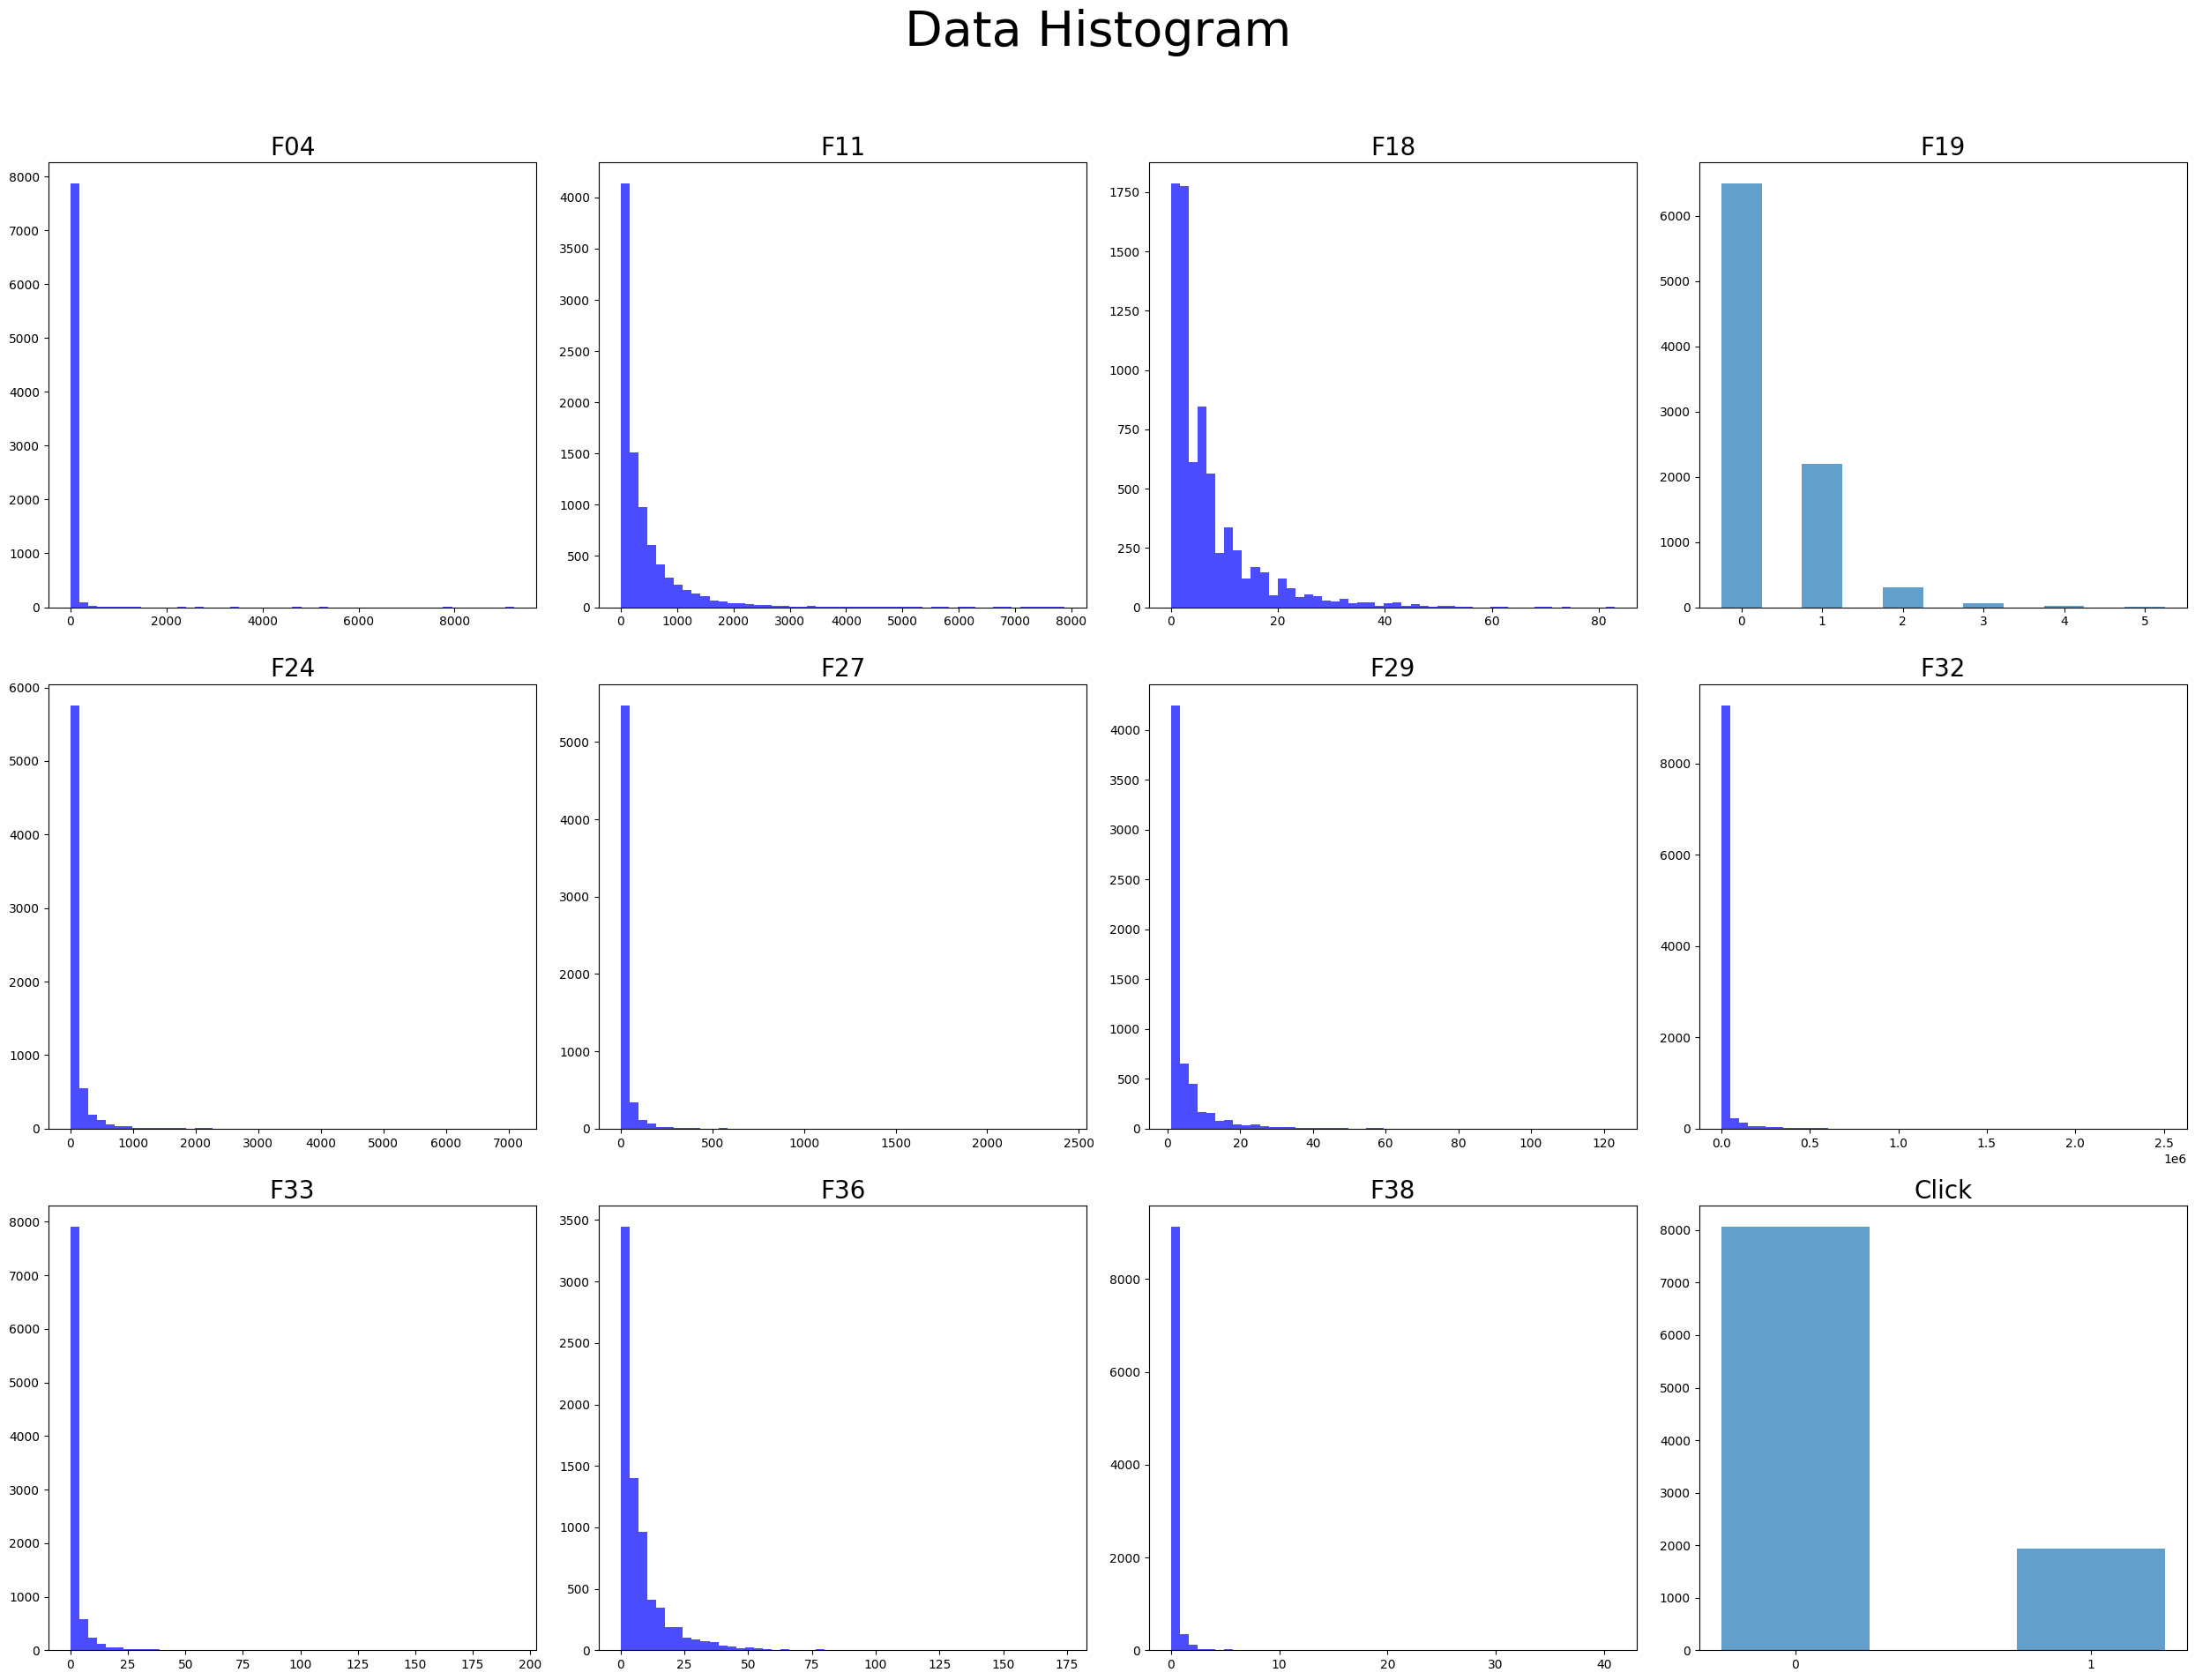

In [12]:
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

cols = train_sample_preprocess[x_num_and_y].columns
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train_sample_preprocess[x_num_and_y][cols[i]].unique()) > 20:
        plt.hist(train_sample_preprocess[x_num_and_y][cols[i]], bins=50, color='b', alpha=0.7)
    else:
        temp = train_sample_preprocess[x_num_and_y][cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
for xstr in numeric_columns:
    print(xstr, "Scew :", train_sample_preprocess[xstr].skew())

F04 Scew : 35.40665908272436
F11 Scew : 4.774852889604385
F18 Scew : 2.5763743675699677
F19 Scew : 2.1301475013977247
F24 Scew : 10.286626678215958
F27 Scew : 13.605087455139982
F29 Scew : 5.309107661744508
F32 Scew : 10.254977375978779
F33 Scew : 10.082247717758012
F36 Scew : 4.71017434777288
F38 Scew : 17.784600656987934


In [14]:
train_sample_preprocess['F04'] = np.log1p(train_sample_preprocess['F04'])
train_sample_preprocess['F11'] = np.log1p(train_sample_preprocess['F11'])
train_sample_preprocess['F18'] = np.log1p(train_sample_preprocess['F18'])
train_sample_preprocess['F24'] = np.log1p(train_sample_preprocess['F24'])
train_sample_preprocess['F27'] = np.log1p(train_sample_preprocess['F27'])
train_sample_preprocess['F29'] = np.log1p(train_sample_preprocess['F29'])
train_sample_preprocess['F32'] = np.log1p(train_sample_preprocess['F32'])
train_sample_preprocess['F33'] = np.log1p(train_sample_preprocess['F33'])
train_sample_preprocess['F36'] = np.log1p(train_sample_preprocess['F36'])
train_sample_preprocess['F38'] = np.log1p(train_sample_preprocess['F38'])

In [15]:
for xstr in numeric_columns:
    print(xstr, "Scew :", train_sample_preprocess[xstr].skew())

F04 Scew : 0.7545281134315125
F11 Scew : -0.49162888867615073
F18 Scew : 0.2939878034417531
F19 Scew : 2.1301475013977247
F24 Scew : 0.0035026857978136413
F27 Scew : 0.8954324785877511
F29 Scew : 1.3568949318574477
F32 Scew : -0.6974495709083615
F33 Scew : 1.9834266073025417
F36 Scew : 0.39593050255013523
F38 Scew : 5.79220025828289


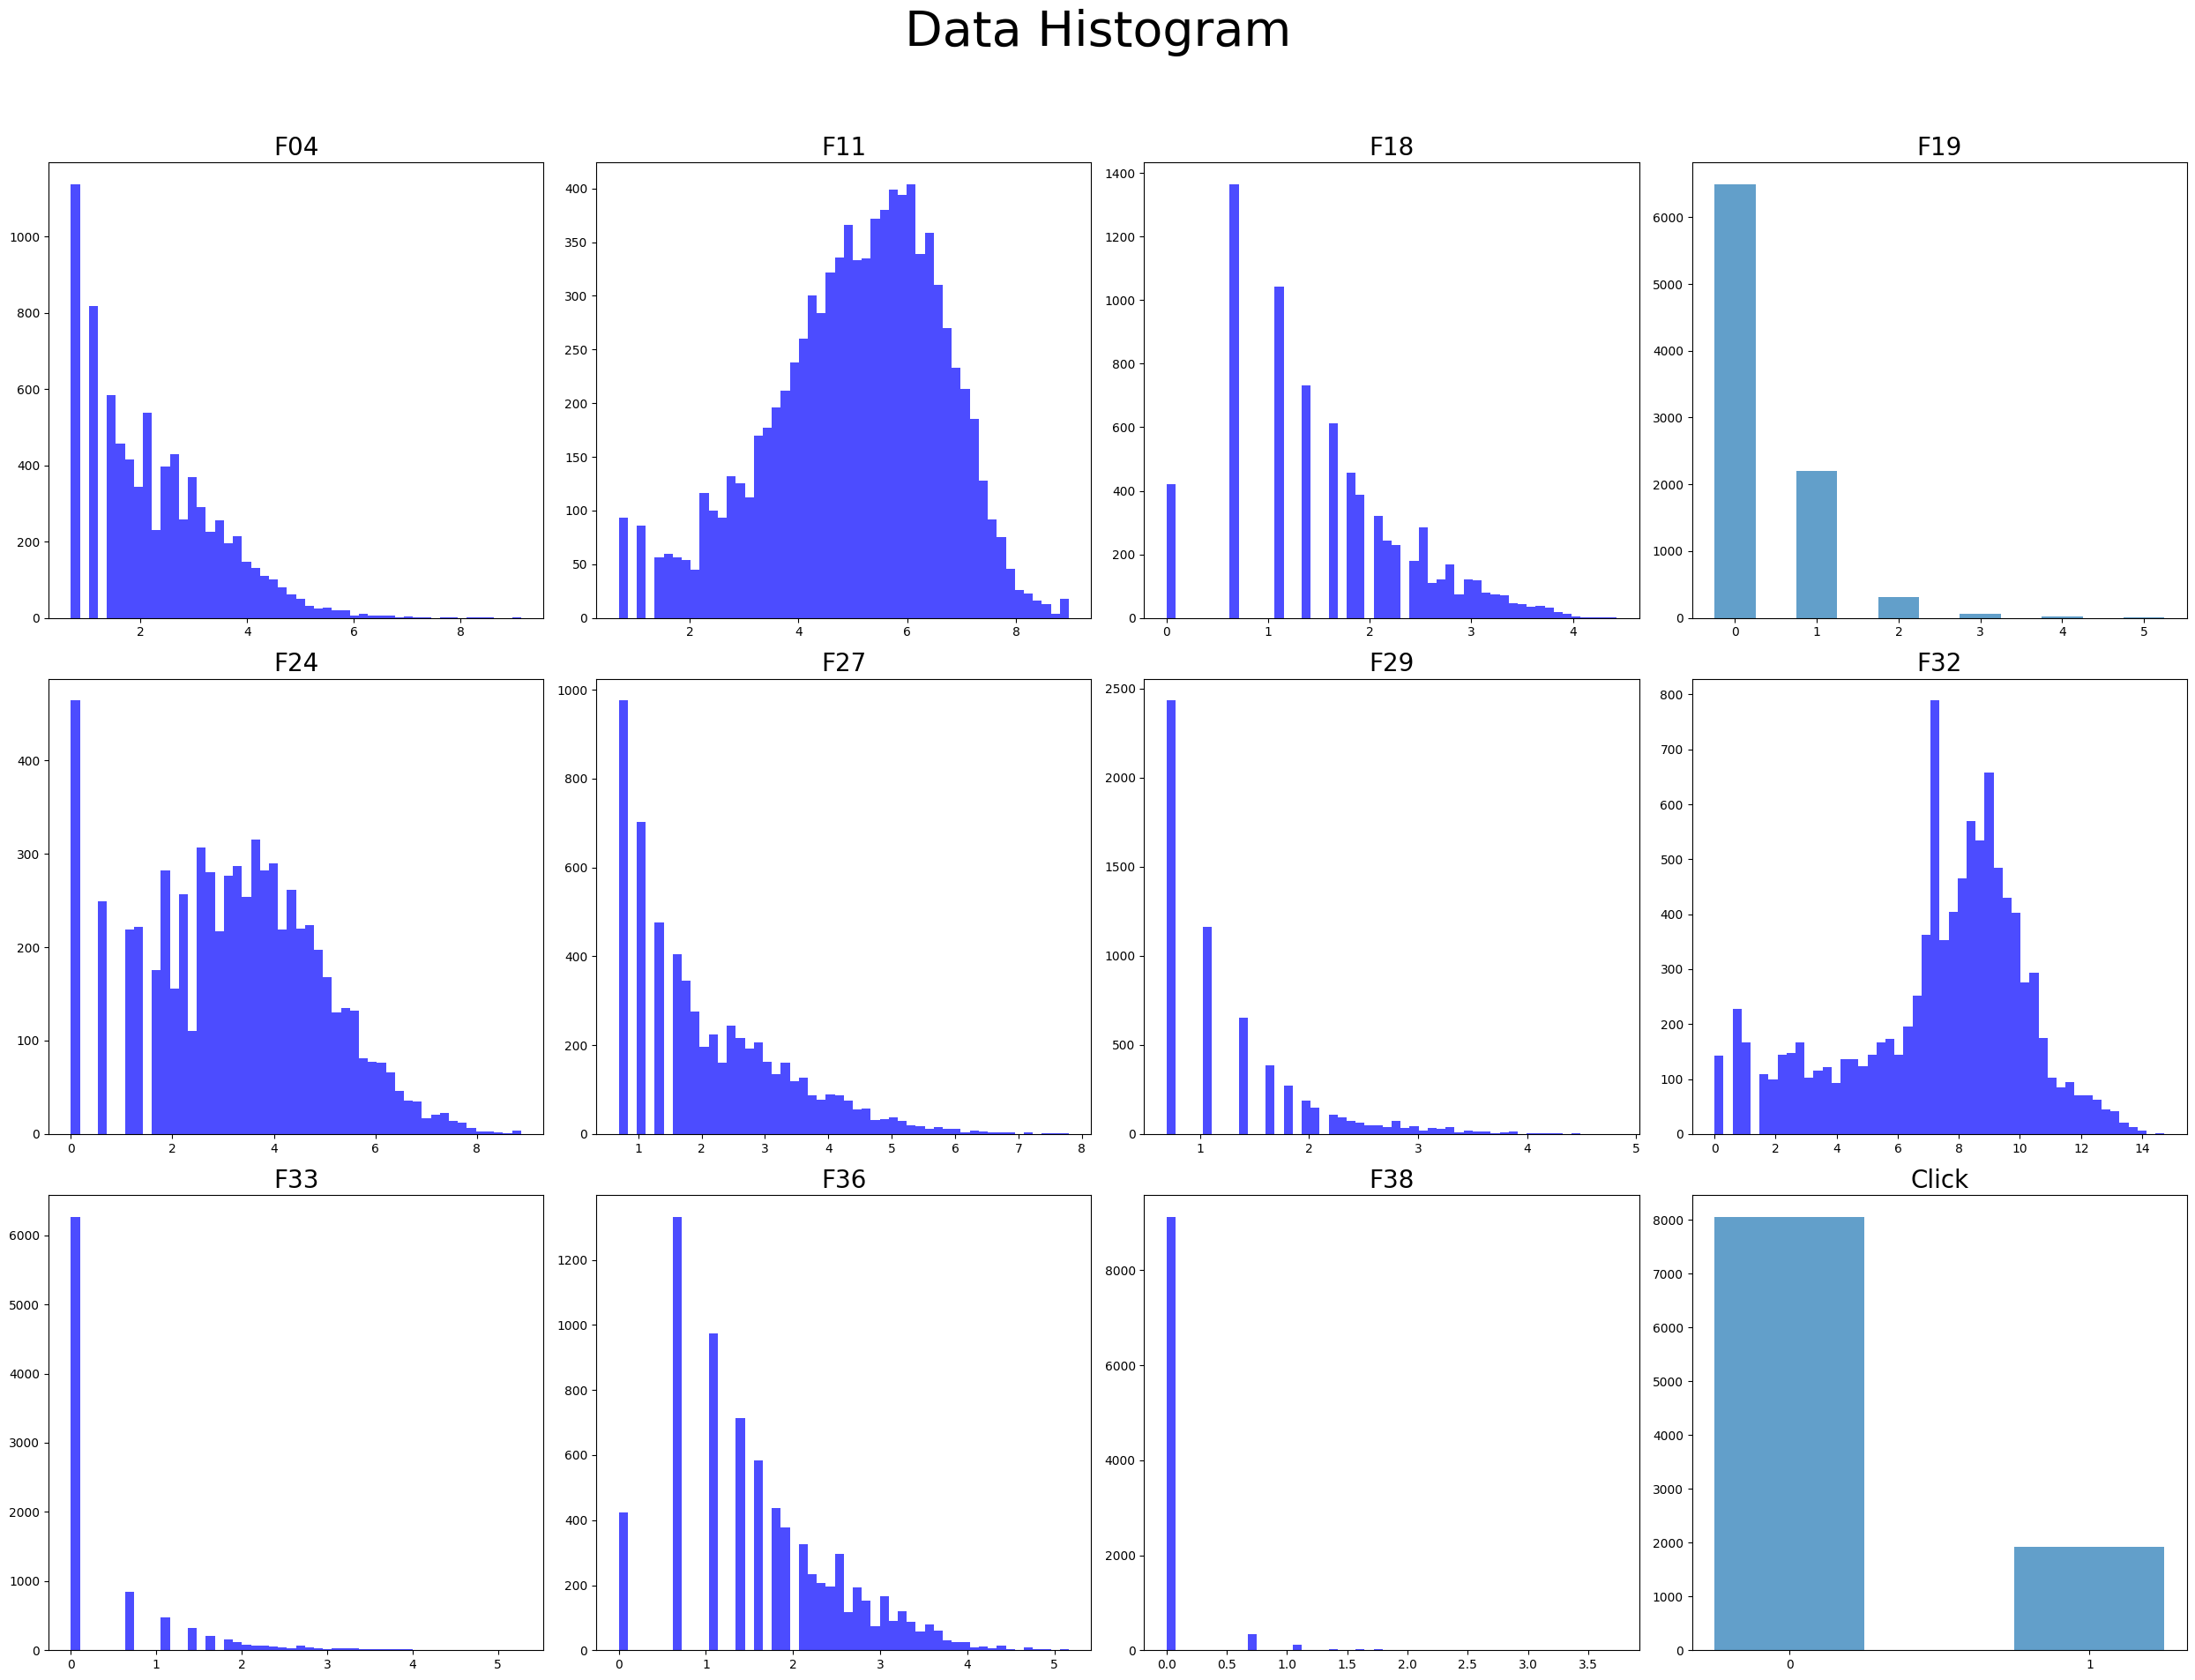

In [16]:
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

cols = train_sample_preprocess[x_num_and_y].columns
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train_sample_preprocess[x_num_and_y][cols[i]].unique()) > 20:
        plt.hist(train_sample_preprocess[x_num_and_y][cols[i]], bins=50, color='b', alpha=0.7)
    else:
        temp = train_sample_preprocess[x_num_and_y][cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
train_sample[numeric_columns].isnull().sum()

F04    2059
F11     988
F18    2626
F19     919
F24    3129
F27    3825
F29    3825
F32      90
F33     919
F36    2626
F38     287
dtype: int64

In [22]:
train_sample[numeric_columns].describe()

,F04,F11,F18,F19,F24,F27,F29,F32,F33,F36,F38
count,7941.000000,9012.000000,7374.000000,9081.000000,6871.000000,6175.000000,6175.000000,9.910000e+03,9081.000000,7374.000000,9713.000000
mean,27.306888,396.532734,6.814076,0.338949,109.396885,26.338138,4.496356,2.016203e+04,2.067504,7.971250,0.193967
std,156.150874,630.121528,9.012508,0.609101,385.431506,107.264591,8.250980,7.463751e+04,8.073558,14.262758,2.967572
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000,59.000000,2.000000,0.000000,7.000000,2.000000,1.000000,3.900000e+02,0.000000,2.000000,0.000000
50%,7.000000,185.000000,4.000000,0.000000,27.000000,6.000000,2.000000,2.742000e+03,0.000000,4.000000,0.000000
75%,21.000000,483.250000,9.000000,1.000000,85.000000,17.000000,4.000000,1.027775e+04,1.000000,9.000000,0.000000
max,7451.000000,7981.000000,176.000000,7.000000,12502.000000,2878.000000,154.000000,1.359260e+06,221.000000,557.000000,256.000000


<Axes: xlabel='F03', ylabel='count'>

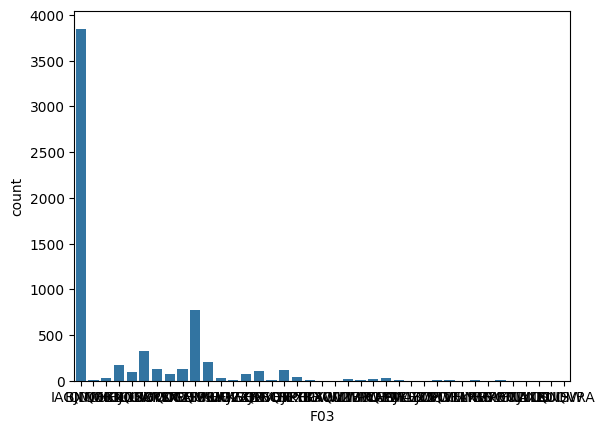

In [24]:
sns.countplot(x = 'F03', data = train_sample)

<Axes: xlabel='F15', ylabel='count'>

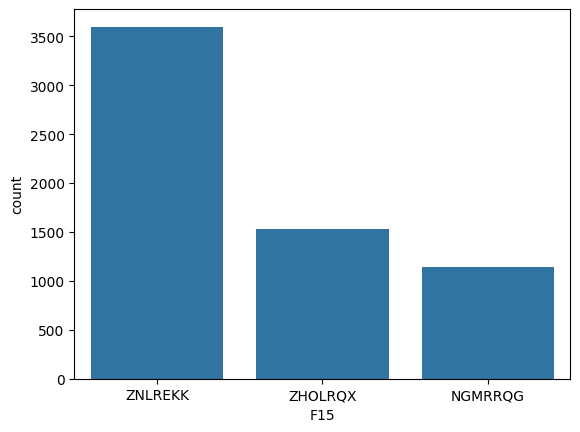

In [25]:
sns.countplot(x = 'F15', data = train_sample)

<Axes: xlabel='F26', ylabel='count'>

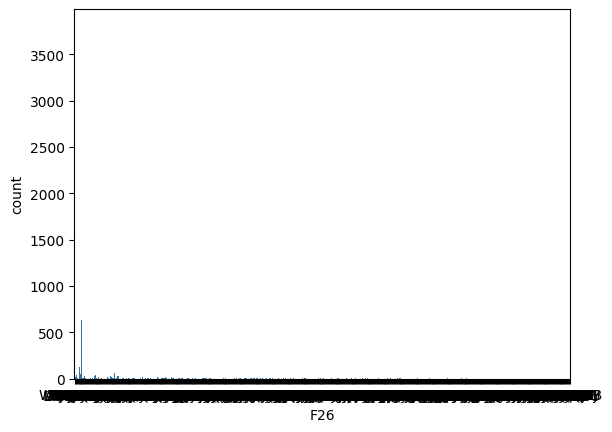

In [27]:
sns.countplot(x = 'F26', data = train_sample)

In [28]:
train_sample['F26'].isnull().sum()

3731

In [29]:
train_sample['F26'].value_counts()

F26
WVRHGBC    3797
YYQVFBZ     631
XSCYNBC     131
SCSXOBU      66
XXQKRUH      47
           ... 
HFNNRXQ       1
CBYEFNQ       1
FNSUIZA       1
VKQGJEE       1
XLFTVBJ       1
Name: count, Length: 527, dtype: int64

# 전처리

결측치부터 채우기

In [ ]:
X_train = X_train.drop(labels='Click',axis=1)

In [83]:
# 범주형 null로 채우기
X_train['F01'] = X_train['F01'].fillna('null')
X_train['F02'] = X_train['F02'].fillna('null')
X_train['F05'] = X_train['F05'].fillna('null')
X_train['F10'] = X_train['F10'].fillna('null')
X_train['F12'] = X_train['F12'].fillna('null')
X_train['F20'] = X_train['F20'].fillna('null')
X_train['F34'] = X_train['F34'].fillna('null')

In [84]:
# 범주형 최빈값으로 채우기
X_train["F03"] = X_train["F03"].fillna(X_train["F03"].mode()[0])
X_train["F15"] = X_train["F15"].fillna(X_train["F15"].mode()[0])
X_train["F26"] = X_train["F26"].fillna(X_train["F26"].mode()[0])

In [85]:
# 수치형 중앙값으로 채우기 
X_train["F04"] = X_train["F04"].fillna(X_train["F04"].median())
X_train["F11"] = X_train["F11"].fillna(X_train["F11"].median())
X_train["F14"] = X_train["F14"].fillna(X_train["F14"].median())
X_train["F18"] = X_train["F18"].fillna(X_train["F18"].median())
X_train["F19"] = X_train["F19"].fillna(X_train["F19"].median())
X_train["F24"] = X_train["F24"].fillna(X_train["F24"].median())
X_train["F27"] = X_train["F27"].fillna(X_train["F27"].median())
X_train["F29"] = X_train["F29"].fillna(X_train["F29"].median())
X_train["F32"] = X_train["F32"].fillna(X_train["F32"].median())
X_train["F33"] = X_train["F33"].fillna(X_train["F33"].median())
X_train["F36"] = X_train["F36"].fillna(X_train["F36"].median())
X_train["F38"] = X_train["F38"].fillna(X_train["F38"].median())

In [86]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# binary_encoder 객체 선언
binary_encoder = ce.BinaryEncoder(cols=['F01', 'F02', 'F05', 'F07', 'F09', 'F10', 'F12', 'F13', 'F16', 'F20', 'F21', 'F22', 'F23', 'F25',
                                 'F26', 'F30', 'F34', 'F37', 'F39'])

# one_hot_encoder 객체 선언
one_hot_encoder = OneHotEncoder()

In [99]:
y_train

1800045     1
20502911    0
6461096     0
17090112    1
18199930    0
           ..
21081788    0
26858567    1
23327850    1
16094478    0
23200604    0
Name: Click, Length: 25744851, dtype: int64

In [100]:
# X_train에서 100000개의 무작위 샘플을 추출
train_sample = X_train.sample(100000, replace=False)

# train_sample에서 선택된 인덱스를 사용하여 y_train에서 동일한 샘플을 추출
y_train_sample = y_train.loc[train_sample.index]

In [104]:
# binary_encoder로 변환
df_binary = binary_encoder.fit_transform(train_sample)

# one_hot encoder로 변환
X = one_hot_encoder.fit_transform(df[['F03', 'F08', 'F15', 'F17', 'F28', 'F31', 'F35']])
df_one_hot = pd.DataFrame(X.toarray(), columns=one_hot_encoder.get_feature_names_out())

In [105]:
# binary 변환후 남아있는 one-hot encoding한 변수를 제거 그 뒤에 one_hot을 concat
df_binary = df_binary.drop(labels=['F03', 'F08', 'F15', 'F17', 'F28', 'F31', 'F35'],axis=1)

df_binary = df_binary.reset_index(drop=True)
df_one_hot = df_one_hot.reset_index(drop=True)

In [106]:
preprocessed_df = pd.concat([df_binary, df_one_hot], axis=1)

In [107]:
preprocessed_df

,F01_0,F01_1,F01_2,F01_3,F01_4,F01_5,F01_6,F01_7,F01_8,F01_9,F01_10,F01_11,F01_12,F01_13,F01_14,F01_15,F02_0,F02_1,F02_2,F02_3,F02_4,F02_5,...,F28_YBZKRWS,F28_YNMNIGT,F28_YQCIJMD,F28_YYEFTXW,F28_ZREDNJU,F31_AZZYLIF,F31_CNEYHMW,F31_ENBEWZP,F31_FUQHXUI,F31_GTISJWW,F31_HWOWDNI,F31_KDTWELZ,F31_KHZNEZF,F31_NYWYONG,F31_PGXXLUF,F31_VNWULJN,F31_WCMLPDK,F31_WCPHYPZ,F31_WHSRKIM,F35_IRUDRFB,F35_MNBSNJV,F35_VVOTUAA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 모델 돌려보기

In [108]:
from catboost import Pool,CatBoostClassifier

In [109]:
iterations = 3000
patience = 50

In [110]:
model = CatBoostClassifier(iterations=iterations,random_state=42,task_type="GPU",eval_metric="F1")

In [111]:
model.fit(preprocessed_df, y_train_sample, 
        early_stopping_rounds=patience ,
        verbose = 100
    )

Learning rate set to 0.009779
0:	learn: 0.0122130	total: 9.01ms	remaining: 27s
100:	learn: 0.0061035	total: 339ms	remaining: 9.72s
200:	learn: 0.0182469	total: 637ms	remaining: 8.87s
300:	learn: 0.0365120	total: 935ms	remaining: 8.38s
400:	learn: 0.0522304	total: 1.23s	remaining: 8s
500:	learn: 0.0645853	total: 1.54s	remaining: 7.66s
600:	learn: 0.0765254	total: 1.84s	remaining: 7.35s
700:	learn: 0.0874988	total: 2.16s	remaining: 7.07s
800:	learn: 0.0952108	total: 2.45s	remaining: 6.74s
900:	learn: 0.1001380	total: 2.75s	remaining: 6.41s
1000:	learn: 0.1047836	total: 3.04s	remaining: 6.08s
1100:	learn: 0.1101022	total: 3.34s	remaining: 5.76s
1200:	learn: 0.1146118	total: 3.63s	remaining: 5.45s
1300:	learn: 0.1203573	total: 3.93s	remaining: 5.13s
1400:	learn: 0.1246775	total: 4.23s	remaining: 4.82s
1500:	learn: 0.1279266	total: 4.53s	remaining: 4.52s
1600:	learn: 0.1328913	total: 4.82s	remaining: 4.21s
1700:	learn: 0.1374074	total: 5.12s	remaining: 3.91s
1800:	learn: 0.1417286	total: 5.

In [ ]:
pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
pred = np.where(pred >= threshold , 1, 0)

# 모델 돌리기

### 1. sample 10000, numeric만 가지고 돌리기

In [17]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [18]:
X = train_sample.drop([label_column], axis=1)
y = train_sample[[label_column]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X[numeric_columns], y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
print('train개수 :',len(X_train))
print('valid개수 :',len(X_val))
print('test개수  :',len(X_test))

train개수 : 6000
valid개수 : 2000
test개수  : 2000


In [21]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss', eval_set=evals)

# predict
y_pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}')

/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1145, number of negative: 4855
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190833 -> initscore=-1.444604
[LightGBM] [Info] Start training from score -1.444604
accuracy: 0.786


### 2. sample 10000, numeric만 가지고 돌리기, numeric에 로그변환

In [22]:
X = train_sample_preprocess.drop([label_column], axis=1)
y = train_sample_preprocess[[label_column]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[numeric_columns], y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [24]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss', eval_set=evals)

# predict
y_pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}')

[LightGBM] [Info] Number of positive: 1195, number of negative: 4801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 5996, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199300 -> initscore=-1.390678
[LightGBM] [Info] Start training from score -1.390678


/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/yjy/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


accuracy: 0.793


# test에 적용하기

In [25]:
y_pred = lgbm_wrapper.predict(test[numeric_columns])

In [26]:
submission = pd.read_csv(sample_path)

In [27]:
submission['Click'] = y_pred

In [28]:
submission

,ID,Click
0,TEST_0000000,0
1,TEST_0000001,0
2,TEST_0000002,0
3,TEST_0000003,0
4,TEST_0000004,1
...,...,...
4538536,TEST_4538536,0
4538537,TEST_4538537,0
4538538,TEST_4538538,0
4538539,TEST_4538539,0


In [29]:
submission.to_csv("submission1.csv",index=False)

In [30]:
import pandas as pd

print(pd.__version__)

2.0.0
